In [1]:
import pandas as pd
import os 
import numpy as np




In [ ]:
import os
import pandas as pd
import re

base_path = "./"

def parse_folder_name(name):
    parts = name.split("_")
    gas = parts[1]
    temp = parts[2].replace("K","")  # 온도 숫자만
    # 압력 범위 추출
    pressure_tokens = [p for p in parts if re.match(r"^\d+(\.\d+)?$", p)]
    low_p, high_p = None, None
    if len(pressure_tokens) >= 2:
        low_p, high_p = pressure_tokens[0], pressure_tokens[-1]
    struct_info, sampling, model = None, None, None
    if "_dataset_" in name:
        after = name.split("_dataset_")[-1]
        tokens = after.split("__")
        struct_info = tokens[0]
        if len(tokens) > 1:
            sampling = tokens[1]
        if len(tokens) > 2:
            model = tokens[2]
    return gas, float(temp), float(low_p), float(high_p), struct_info, sampling, model

rows = []
grid_folders = [f for f in os.listdir(base_path) if f.startswith("GRID_RUNS_") and os.path.isdir(os.path.join(base_path,f))]

for folder in grid_folders:
    gas, temp, low_p, high_p, struct_info, sampling, model = parse_folder_name(folder)
    folder_path = os.path.join(base_path, folder)
    row = {
        "gas": gas,
        "temperature": temp,
        "low_pressure": low_p,
        "high_pressure": high_p,
        "struct_info": struct_info,
        "sampling": sampling,
        "model": model
    }
    for trial in os.listdir(folder_path):
        trial_path = os.path.join(folder_path, trial)
        if os.path.isdir(trial_path) and trial.startswith("trial_"):
            for file in os.listdir(trial_path):
                if file.startswith("metrics_holdout") and file.endswith(".csv"):
                    df = pd.read_csv(os.path.join(trial_path, file))
                    if not df.empty:
                        metrics = df.iloc[0].to_dict()
                        for k,v in metrics.items():
                            if k in ["R2","MAE","RMSE","MAPE_percent"]:
                                row[f"{trial}_{k}"] = v
    rows.append(row)

final_df = pd.DataFrame(rows)
final_df.to_csv("aggregated_metrics_clean.csv", index=False)
print("Saved aggregated_metrics_clean.csv")


ValueError: could not convert string to float: 'TEST'

In [ ]:
import os
import pandas as pd
import re

base_path = "./"

def parse_folder_name(name):
    parts = name.split("_")
    gas = parts[0]
    temp = 313
    # 압력 범위 추출
    low_p, high_p = parts[3].replace("bar",""), None
    if len(pressure_tokens) >= 2:
        low_p, high_p = pressure_tokens[0], pressure_tokens[-1]
    struct_info, sampling, model = None, None, None
    if "_dataset_" in name:
        after = name.split("_dataset_")[-1]
        tokens = after.split("__")
        struct_info = tokens[0]
        if len(tokens) > 1:
            sampling = tokens[1]
        if len(tokens) > 2:
            model = tokens[2]
    return gas, float(temp), float(low_p), float(high_p), struct_info, sampling, model

rows = []
grid_folders = [f for f in os.listdir(base_path) if f.startswith("Ar_rerun_TEST_") and os.path.isdir(os.path.join(base_path,f))]

for folder in grid_folders:
    gas, temp, low_p, high_p, struct_info, sampling, model = parse_folder_name(folder)
    folder_path = os.path.join(base_path, folder)
    row = {
        "gas": gas,
        "temperature": temp,
        "low_pressure": low_p,
        "high_pressure": high_p,
        "struct_info": struct_info,
        "sampling": sampling,
        "model": model
    }
    for trial in os.listdir(folder_path):
        trial_path = os.path.join(folder_path, trial)
        if os.path.isdir(trial_path) and trial.startswith("trial_"):
            for file in os.listdir(trial_path):
                if file.startswith("metrics_holdout") and file.endswith(".csv"):
                    df = pd.read_csv(os.path.join(trial_path, file))
                    if not df.empty:
                        metrics = df.iloc[0].to_dict()
                        for k,v in metrics.items():
                            if k in ["R2","MAE","RMSE","MAPE_percent"]:
                                row[f"{trial}_{k}"] = v
    rows.append(row)

final_df = pd.DataFrame(rows)
final_df.to_csv("aggregated_metrics_clean_rerun.csv", index=False)
print("Saved aggregated_metrics_clean_rerun.csv")


In [ ]:
parse_folder_name(folder)

In [12]:
final_df

,gas,temperature,pressure_range,struct_info,sampling,model,trial_001_Model,trial_001_R2,trial_001_MAE,trial_001_RMSE,...,trial_004_predict_time_sec,trial_005_Model,trial_005_R2,trial_005_MAE,trial_005_RMSE,trial_005_MAPE_percent,trial_005_n_train,trial_005_n_test,trial_005_fit_time_sec,trial_005_predict_time_sec
0,RUNS,Ar,273K_Ar_273,struct+input,qt_then_rd,cat,cat,0.961278,0.102850,0.025910,...,0.002292,cat,0.953047,0.106913,0.030560,5.532962,6213,1553,3.491001,0.002300
1,RUNS,Ar,273K_Ar_273,struct+input,qt_then_rd,gbm,gbm,0.959874,0.103147,0.026850,...,0.012245,gbm,0.952513,0.106706,0.030908,5.259507,6213,1553,15.541272,0.012069
2,RUNS,Ar,273K_Ar_273,struct+input,qt_then_rd,rf,rf,0.955179,0.101437,0.029992,...,0.280853,rf,0.947754,0.104827,0.034006,5.129294,6213,1553,35.991968,0.282099
3,RUNS,Ar,273K_Ar_273,struct+input,random_struct,cat,cat,0.935458,0.123137,0.062272,...,0.002326,cat,0.942212,0.118484,0.057130,6.174892,6213,1553,3.506600,0.002307
4,RUNS,Ar,273K_Ar_273,struct+input,random_struct,gbm,gbm,0.941161,0.120080,0.056769,...,0.012683,gbm,0.940388,0.119701,0.058933,6.157140,6213,1553,15.774862,0.012956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RUNS,O2,293K_O2_293,struct+input,random_with_input,gbm,gbm,0.626585,0.080120,0.382458,...,0.012093,gbm,0.614787,0.085330,0.394303,4.808026,5690,1423,14.180165,0.011982
104,RUNS,O2,293K_O2_293,struct+input,random_with_input,rf,rf,0.628784,0.080471,0.380206,...,0.266258,rf,0.625758,0.084096,0.383073,4.605734,5690,1423,32.723660,0.265604
105,RUNS,O2,293K_O2_293,struct,random_struct,cat,cat,0.200664,0.342934,0.818693,...,0.002163,cat,0.196103,0.338099,0.822867,31.684699,5690,1423,3.080801,0.002145
106,RUNS,O2,293K_O2_293,struct,random_struct,gbm,gbm,0.198309,0.345314,0.821105,...,0.011071,gbm,0.187832,0.347843,0.831333,32.659289,5690,1423,12.478467,0.011061


In [13]:
import os
import re
import pandas as pd

base_path = "./try02"

# Helper function to parse folder name into attributes
def parse_folder_name(name):
    # Example: GRID_RUNS_Ar_273K_Ar_273_0.01_to_Ar_273_15_dataset_struct+input__qt_then_rd__cat
    parts = name.split("_")
    gas = parts[2]   # Ar
    temp = parts[3]  # 273K
    low_pressure = parts[6]  # Ar_273_0.01_to_Ar_273_15_dataset
    high_pressure = parts[10]  # Ar_273_0.01_to_Ar_273_15_dataset
    struct_info = None
    sampling = None
    model = None
    
    if "__" in name:
        after_dataset = name.split("_dataset_")[-1]
        tokens = after_dataset.split("__")
        struct_info = tokens[0]  # struct or struct+input
        if len(tokens) > 1:
            sampling = tokens[1]  # qt_then_rd, random_struct, etc.
        if len(tokens) > 2:
            model = tokens[2]  # cat, gbm, rf
    return gas, temp, low_pressure, high_pressure, struct_info, sampling, model

metrics_dict = {}

# Scan GRID_RUNS_* folders
grid_folders = [f for f in os.listdir(base_path) if f.startswith("GRID_RUNS") and os.path.isdir(os.path.join(base_path,f))]

for folder in grid_folders:
    gas, temp,  low_pressure, high_pressure, struct_info, sampling, model = parse_folder_name(folder)
    folder_path = os.path.join(base_path, folder)
    
    for trial in os.listdir(folder_path):
        trial_path = os.path.join(folder_path, trial)
        if os.path.isdir(trial_path) and trial.startswith("trial_"):
            for file in os.listdir(trial_path):
                if file.startswith("metrics_holdout") and file.endswith(".csv"):
                    metrics_file = os.path.join(trial_path, file)
                    df = pd.read_csv(metrics_file)
                    # Expect single row
                    if not df.empty:
                        key = (gas, temp,  low_pressure, high_pressure, struct_info, sampling, model)
                        if key not in metrics_dict:
                            metrics_dict[key] = {}
                        metrics_dict[key][trial] = df.iloc[0].to_dict()

# Now build a DataFrame with trials as columns of metrics
rows = []
for key, trial_data in metrics_dict.items():
    gas, temp,  low_pressure, high_pressure, struct_info, sampling, model = key
    row = {
        "gas": gas,
        "temperature": temp,
        "low_pressure":  low_pressure, 
        "high_pressure" : high_pressure,
        "struct_info": struct_info,
        "sampling": sampling,
        "model": model
    }
    # For each trial, flatten its metrics into subcolumns
    for trial, metrics in trial_data.items():
        for metric_name, metric_value in metrics.items():
            col_name = f"{trial}_{metric_name}"
            row[col_name] = metric_value
    rows.append(row)

final_df = pd.DataFrame(rows)

# import caas_jupyter_tools
# caas_jupyter_tools.display_dataframe_to_user("Aggregated Trial Metrics", final_df)


In [9]:
final_df.to_csv("./Performance_summary.csv")

In [14]:
import pandas as pd

# 어떤 metric들을 평균/표준편차 낼지 지정
metrics = ["R2", "MAE", "RMSE", "MAPE_percent", "fit_time_sec", "predict_time_sec"]
final_df2 = final_df.copy()
for metric in metrics:
    cols = [c for c in final_df.columns if c.endswith(metric)]
    # 평균과 표준편차 계산
    final_df2 [f"{metric}_mean"] = final_df[cols].mean(axis=1)
    final_df2 [f"{metric}_std"] = final_df[cols].std(axis=1)

# 결과 확인
# print(final_df.filter(regex="R2"))
final_df2 


,gas,temperature,low_pressure,high_pressure,struct_info,sampling,model,trial_001_Model,trial_001_R2,trial_001_MAE,...,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAPE_percent_mean,MAPE_percent_std,fit_time_sec_mean,fit_time_sec_std,predict_time_sec_mean,predict_time_sec_std
0,Ar,273K,0.01,15,struct+input,qt_then_rd,cat,cat,0.946156,0.266971,...,0.265519,0.005655,0.144279,0.009132,7.038604,0.153524,3.450755,0.051644,0.002349,0.000063
1,Ar,273K,0.01,15,struct+input,qt_then_rd,gbm,gbm,0.940380,0.280786,...,0.274633,0.006778,0.153865,0.010470,7.259230,0.211590,15.583184,0.293691,0.012451,0.000089
2,Ar,273K,0.01,15,struct+input,qt_then_rd,rf,rf,0.940046,0.270786,...,0.261760,0.008367,0.153101,0.011056,6.901858,0.235021,36.690046,0.131235,0.292741,0.012137
3,Ar,273K,0.01,15,struct+input,random_struct,cat,cat,0.952108,0.268925,...,0.275067,0.011232,0.178021,0.031130,7.543422,0.193694,3.542475,0.161342,0.002111,0.000191
4,Ar,273K,0.01,15,struct+input,random_struct,gbm,gbm,0.949015,0.274821,...,0.280398,0.012098,0.182328,0.027376,7.557032,0.203881,15.436618,0.029867,0.012785,0.000127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,O2,293K,0.01,5,struct+input,random_struct,gbm,gbm,0.965137,0.062808,...,0.066281,0.006532,0.077399,0.133819,4.696461,0.270365,14.047128,0.090126,0.011829,0.000164
725,O2,293K,0.01,5,struct+input,random_struct,rf,rf,0.951200,0.065580,...,0.065626,0.007535,0.079001,0.133485,4.463321,0.222790,33.611645,0.628979,0.283737,0.013069
726,O2,293K,0.01,5,struct,random_struct,cat,cat,0.433076,0.317220,...,0.321031,0.007886,0.346628,0.230815,32.443270,1.133381,3.258720,0.126854,0.002250,0.000060
727,O2,293K,0.01,5,struct,random_struct,gbm,gbm,0.343291,0.329715,...,0.329292,0.006856,0.361882,0.225842,33.345286,1.010992,12.597035,0.262022,0.011074,0.000107


In [15]:
final_df2.to_csv("./Performance_summary_aggregated.csv")

In [18]:
Performance_summary_aggregated = pd.read_csv("./Performance_summary_aggregated.csv").iloc[:, 1:]
RF = Performance_summary_aggregated[Performance_summary_aggregated["model"] == "rf"]
CAT = Performance_summary_aggregated[Performance_summary_aggregated["model"] == "cat"]
GBM = Performance_summary_aggregated[Performance_summary_aggregated["model"] == "gbm"]
RF.to_csv("Performance_summary_aggregated_RF.csv")
CAT.to_csv("Performance_summary_aggregated_CAT.csv")
GBM.to_csv("Performance_summary_aggregated_GBM.csv")

In [25]:
for INDEX , group in RF.groupby(by = ["gas", "low_pressure", "high_pressure"]):
    print(INDEX)
group
# CAT
# GBM

('Ar', 0.01, 1)
('Ar', 0.01, 5)
('Ar', 0.01, 15)
('Ar', 0.05, 1)
('Ar', 0.05, 5)
('Ar', 0.05, 15)
('Ar', 0.1, 1)
('Ar', 0.1, 5)
('Ar', 0.1, 15)
('Ar', 0.5, 1)
('Ar', 0.5, 5)
('Ar', 0.5, 15)
('H2', 0.01, 5)
('He', 0.01, 1)
('He', 0.01, 5)
('He', 0.01, 15)
('He', 0.05, 1)
('He', 0.05, 5)
('He', 0.05, 15)
('He', 0.1, 1)
('He', 0.1, 5)
('He', 0.1, 15)
('He', 0.2, 1)
('He', 0.2, 5)
('He', 0.2, 15)
('He', 0.35, 1)
('He', 0.35, 5)
('He', 0.35, 15)
('He', 0.5, 1)
('He', 0.5, 5)
('He', 0.5, 15)
('N2', 0.01, 5)
('O2', 0.01, 5)


,gas,temperature,low_pressure,high_pressure,struct_info,sampling,model,trial_001_Model,R2_mean,R2_std,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAPE_percent_mean,MAPE_percent_std,fit_time_sec_mean,fit_time_sec_std,predict_time_sec_mean,predict_time_sec_std
722,O2,293K,0.01,5,struct+input,qt_then_rd,rf,rf,0.968924,0.003725,0.057207,0.001831,0.008758,0.001018,4.256741,0.075793,33.736632,0.077503,0.261530,0.002259
725,O2,293K,0.01,5,struct+input,random_struct,rf,rf,0.898954,0.125561,0.065626,0.007535,0.079001,0.133485,4.463321,0.222790,33.611645,0.628979,0.283737,0.013069
728,O2,293K,0.01,5,struct,random_struct,rf,rf,0.372713,0.089210,0.307730,0.009596,0.350030,0.225062,31.709685,1.382121,36.192559,0.771641,0.270361,0.004091


In [34]:
RF_GROUPS = RF.groupby(by = ["gas", "low_pressure", "high_pressure", "temperature"])
subset = RF_GROUPS.get_group(("He" , 0.01, 15, "273K"))
subset
# gas	temperature	low_pressure	high_pressure	struct_info	sampling	model	trial_001_Model	R2_mean	R2_std	MAE_mean	MAE_std	RMSE_mean	RMSE_std	MAPE_percent_mean	MAPE_percent_std	fit_time_sec_mean	fit_time_sec_std	predict_time_sec_mean	predict_time_sec_std
# 335	He	273K	0.01	15	struct+input	qt_then_rd	rf	rf	0.988598	0.000725	0.014620	0.000183	0.000414	0.000022	6.579538	0.164069	51.490634	0.147805	0.390773	0.011467
# 338	He	273K	0.01	15	struct+input	random_struct	rf	rf	0.957494	0.050781	0.015684	0.000927	0.004474	0.006129	6.846306	0.133252	51.409040	0.336139	0.411297	0.020656
# 341	He	273K	0.01	15	struct	random_struct	rf	rf	0.949595	0.049115	0.021829	0.000841	0.005172	0.006070	11.587092	0.328933	50.281732	0.089749	0.410057	0.017641

모든 subset에 대하여 R2 mean, R2 std, MAE mean, MAE std 한 Figure에 plot해서 저장까지 하는 코드 이름과 title은 잘 만들어줘

,gas,temperature,low_pressure,high_pressure,struct_info,sampling,model,trial_001_Model,R2_mean,R2_std,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAPE_percent_mean,MAPE_percent_std,fit_time_sec_mean,fit_time_sec_std,predict_time_sec_mean,predict_time_sec_std
335,He,273K,0.01,15,struct+input,qt_then_rd,rf,rf,0.988598,0.000725,0.014620,0.000183,0.000414,0.000022,6.579538,0.164069,51.490634,0.147805,0.390773,0.011467
338,He,273K,0.01,15,struct+input,random_struct,rf,rf,0.957494,0.050781,0.015684,0.000927,0.004474,0.006129,6.846306,0.133252,51.409040,0.336139,0.411297,0.020656
341,He,273K,0.01,15,struct,random_struct,rf,rf,0.949595,0.049115,0.021829,0.000841,0.005172,0.006070,11.587092,0.328933,50.281732,0.089749,0.410057,0.017641


In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os

plt.style.use("seaborn-v0_8-whitegrid")  # 깔끔한 스타일

# 저장 폴더 지정
save_dir = "./Figures_RF"
os.makedirs(save_dir, exist_ok=True)

# groupby 객체
RF_GROUPS = RF.groupby(["gas", "low_pressure", "high_pressure", "temperature"])

for key, subset in RF_GROUPS:
    gas, lowp, highp, temp = key

    labels = subset["sampling"] + "_" + subset["struct_info"] + "_" + subset["model"]

    # 색상 팔레트
    colors_r2 = cm.Blues(np.linspace(0.4, 0.8, len(subset)))
    colors_mae = cm.Reds(np.linspace(0.4, 0.8, len(subset)))

    # ▶ 1행 2열 subplot (옆으로), 세로는 길게
    fig, axes = plt.subplots(1, 2, figsize=(14, 10), dpi=150)

    # --- R² plot ---
    bars1 = axes[0].bar(labels, subset["R2_mean"], yerr=subset["R2_std"],
                        capsize=4, color=colors_r2, alpha=0.9)
    axes[0].set_title("R² Performance", fontsize=14, fontweight="bold")
    axes[0].set_ylabel("R²", fontsize=12)
    axes[0].set_ylim(0, 1.05)
    axes[0].tick_params(axis='x', rotation=45)

    for bar in bars1:
        h = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, h + 0.01,
                     f"{h:.3f}", ha='center', va='bottom', fontsize=10)

    # --- MAE plot ---
    bars2 = axes[1].bar(labels, subset["MAE_mean"], yerr=subset["MAE_std"],
                        capsize=4, color=colors_mae, alpha=0.9)
    axes[1].set_title("MAE Performance", fontsize=14, fontweight="bold")
    axes[1].set_ylabel("MAE", fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)

    for bar in bars2:
        h = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, h + (0.02*h if h > 0 else 0.01),
                     f"{h:.3f}", ha='center', va='bottom', fontsize=10)

    # Figure 전체 제목
    fig.suptitle(f"{gas} | P: {lowp}–{highp} bar | T: {temp}",
                 fontsize=16, fontweight="bold")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fname = f"group_{gas}_{lowp}_{highp}_{temp}.png".replace(" ", "_")
    plt.savefig(os.path.join(save_dir, fname))
    plt.close(fig)

    print(f"Saved {fname}")


Saved group_Ar_0.01_1_273K.png
Saved group_Ar_0.01_1_293K.png
Saved group_Ar_0.01_1_313K.png
Saved group_Ar_0.01_5_273K.png
Saved group_Ar_0.01_5_293K.png
Saved group_Ar_0.01_5_313K.png
Saved group_Ar_0.01_15_273K.png
Saved group_Ar_0.01_15_293K.png
Saved group_Ar_0.01_15_313K.png
Saved group_Ar_0.05_1_273K.png
Saved group_Ar_0.05_1_293K.png
Saved group_Ar_0.05_1_313K.png
Saved group_Ar_0.05_5_273K.png
Saved group_Ar_0.05_5_293K.png
Saved group_Ar_0.05_5_313K.png
Saved group_Ar_0.05_15_273K.png
Saved group_Ar_0.05_15_293K.png
Saved group_Ar_0.05_15_313K.png
Saved group_Ar_0.1_1_273K.png
Saved group_Ar_0.1_1_293K.png
Saved group_Ar_0.1_1_313K.png
Saved group_Ar_0.1_5_273K.png
Saved group_Ar_0.1_5_293K.png
Saved group_Ar_0.1_5_313K.png
Saved group_Ar_0.1_15_273K.png
Saved group_Ar_0.1_15_293K.png
Saved group_Ar_0.1_15_313K.png
Saved group_Ar_0.5_1_273K.png
Saved group_Ar_0.5_1_293K.png
Saved group_Ar_0.5_1_313K.png
Saved group_Ar_0.5_5_273K.png
Saved group_Ar_0.5_5_293K.png
Saved group_A

,filename,name,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,Has_OMS,Input,y_true,y_pred
0,1499489-acs.cgd.6b01265_1499490_clean,1499489-acs.cgd.6b01265_1499490_clean,10.85017,3.77263,10.26663,0.884188,1701.530,1924.400,0.000000,0.000000,0.6458,0.730388,0.0,0,0.005118,2.036321,1.902740
1,ACODAZ_clean,ACODAZ_clean,23.29182,13.11646,23.29182,0.343144,1530.830,4461.210,0.000000,0.000000,0.8618,2.511480,0.0,1,0.003023,1.594811,1.435492
2,acs.chemmater.5b03723_cm5b03723_si_005_clean,acs.chemmater.5b03723_cm5b03723_si_005_clean,14.22819,7.43560,14.22819,0.645145,2122.450,3289.880,0.000000,0.000000,0.7418,1.149820,0.0,1,0.004089,1.735868,1.807837
3,AQEGUY_clean,AQEGUY_clean,5.54395,4.66139,5.49926,1.463550,1275.660,871.620,0.000000,0.000000,0.5148,0.351747,0.0,1,0.004539,1.456638,1.633289
4,AQOTIK_clean,AQOTIK_clean,6.78170,3.86887,6.78051,1.473480,1288.350,874.359,0.000000,0.000000,0.5612,0.380867,0.0,1,0.003589,1.409598,1.334799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,ZOTKAW_clean,ZOTKAW_clean,4.77881,3.75238,4.76637,1.433830,643.033,448.471,0.000000,0.000000,0.4312,0.300732,0.0,1,0.001070,0.473804,0.455970
1548,ZOZHON_clean,ZOZHON_clean,7.30118,5.11086,5.92942,1.044570,1885.430,1804.990,0.016074,0.015388,0.6212,0.594697,0.0,0,0.003657,1.444582,1.486781
1549,ZUDQUM_clean,ZUDQUM_clean,5.81277,5.42910,5.81277,1.090470,1603.640,1470.590,0.000000,0.000000,0.5888,0.539951,0.0,0,0.003419,1.318381,1.432702
1550,ZUQMAB_clean,ZUQMAB_clean,6.12654,3.97231,6.12654,1.081890,1594.490,1473.800,0.000000,0.000000,0.5652,0.522421,0.0,0,0.002938,1.228897,1.268489


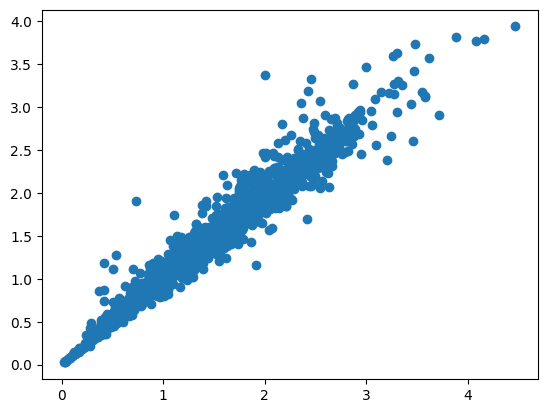

In [35]:
import os 
import pandas as pd
# path = "./try02/GRID_RUNS_Ar_273K_Ar_273_0.01_to_Ar_273_15_dataset_struct+input__qt_then_rd__gbm/"
import matplotlib.pyplot as plt
# os.chdir(path)
pd.read_csv("./try02/GRID_RUNS_Ar_313K_Ar_313_0.01_to_Ar_313_5_dataset_struct+input__qt_then_rd__rf/trial_002/metrics_holdout_trial002.csv")

# pd.read_csv("./trial_")

pd.read_csv("././try02/GRID_RUNS_Ar_313K_Ar_313_0.01_to_Ar_313_5_dataset_struct+input__qt_then_rd__rf/trial_002/train_indices_trial002.csv")
df1 = pd.read_csv("././try02/GRID_RUNS_Ar_313K_Ar_313_0.01_to_Ar_313_5_dataset_struct+input__qt_then_rd__rf/trial_002/predictions_holdout_trial002.csv")
# df = pd.read_csv("././try02/GRID_RUNS_Ar_293K_Ar_293_0.01_to_Ar_293_5_dataset_struct+input__qt_then_rd__rf/trial_002/predictions_holdout_trial002.csv")
# df = pd.read_csv("././try02/GRID_RUNS_Ar_293K_Ar_293_0.01_to_Ar_293_5_dataset_struct+input__qt_then_rd__rf/trial_002/metrics_holdout_trial002.csv")
plt.scatter(df["y_true"], df["y_pred"])
df1



In [28]:
# df = pd.read_csv("././try02/GRID_RUNS_Ar_293K_Ar_293_0.01_to_Ar_293_5_dataset_struct+input__qt_then_rd__rf/trial_002/metrics_holdout_trial002.csv")
df0 = pd.read_csv("././try02/GRID_RUNS_Ar_293K_Ar_293_0.01_to_Ar_293_5_dataset_struct+input__qt_then_rd__rf/trial_002/predictions_holdout_trial002.csv")

df

,filename,name,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,Has_OMS,Input,y_true,y_pred
0,1499489-acs.cgd.6b01265_1499490_clean,1499489-acs.cgd.6b01265_1499490_clean,10.85017,3.77263,10.26663,0.884188,1701.53,1924.40,0.000,0.0000,0.6458,0.730388,0.0,0,0.007367,2.784855,2.479710
1,ACOCOM_clean,ACOCOM_clean,24.60642,13.03430,24.60642,0.349927,1537.41,4393.52,0.000,0.0000,0.8630,2.466230,0.0,1,0.003839,1.830443,1.795625
2,ACODAZ_clean,ACODAZ_clean,23.29182,13.11646,23.29182,0.343144,1530.83,4461.21,0.000,0.0000,0.8618,2.511480,0.0,1,0.003834,1.831393,1.802877
3,acscombsci.5b00188_5013797_clean,acscombsci.5b00188_5013797_clean,9.69678,6.71185,9.61668,0.664961,2272.90,3418.09,0.000,0.0000,0.7302,1.098110,0.0,0,0.003535,1.569627,1.642721
4,acs.inorgchem.6b00276_ic6b00276_si_006_clean,acs.inorgchem.6b00276_ic6b00276_si_006_clean,14.12459,8.71298,14.12459,0.761320,1982.07,2603.46,21.492,28.2299,0.7202,0.945989,0.0,1,0.010867,2.923456,2.685770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,ZUBFIN_clean,ZUBFIN_clean,7.69352,3.71325,7.67785,1.112380,1215.17,1092.41,0.000,0.0000,0.5518,0.496052,0.0,1,0.007011,2.080158,2.057334
2259,ZUCKIT_clean,ZUCKIT_clean,21.54143,12.82644,21.54143,0.534491,1102.82,2063.31,408.868,764.9670,0.7688,1.438380,0.0,1,0.004020,1.707204,1.685857
2260,ZUDQEW_clean,ZUDQEW_clean,6.37940,3.06561,6.37940,1.532180,0.00,0.00,1139.020,743.3960,0.5290,0.345260,0.0,1,0.001947,0.816262,0.797144
2261,ZUKNAW_clean,ZUKNAW_clean,11.21967,10.68501,10.99660,0.962771,2472.04,2567.63,0.000,0.0000,0.7894,0.819925,0.0,1,0.001045,0.497695,0.511430


In [34]:
df0["y_true"] ,df1["y_true"]

(0       2.784855
 1       1.830443
 2       1.831393
 3       1.569627
 4       2.923456
           ...   
 2258    2.080158
 2259    1.707204
 2260    0.816262
 2261    0.497695
 2262    1.689776
 Name: y_true, Length: 2263, dtype: float64,
 0       2.036321
 1       1.594811
 2       1.735868
 3       1.456638
 4       1.409598
           ...   
 1547    0.473804
 1548    1.444582
 1549    1.318381
 1550    1.228897
 1551    2.632899
 Name: y_true, Length: 1552, dtype: float64)

In [36]:
pd.read_csv("../Data_collect/DataSet/Ar_313K/Ar_313K_Ar_313_0.01_to_Ar_313_5_dataset.csv")

,filename,LCD,PLD,LFPD,cm3_g,ASA_m2_cm3,ASA_m2_g,NASA_m2_cm3,NASA_m2_g,AV_VF,AV_cm3_g,NAV_cm3_g,Has_OMS,name,Input,Output
0,1499489-acs.cgd.6b01265_1499490_clean,10.85017,3.77263,10.26663,0.884188,1701.53,1924.400,0.0,0.0,0.6458,0.730388,0.0,0,1499489-acs.cgd.6b01265_1499490_clean,0.005118,2.036321
1,ACOCOM_clean,24.60642,13.03430,24.60642,0.349927,1537.41,4393.520,0.0,0.0,0.8630,2.466230,0.0,1,ACOCOM_clean,0.003168,1.473823
2,ACOCUS_clean,24.38417,13.22222,24.38417,0.346494,1518.48,4382.420,0.0,0.0,0.8644,2.494710,0.0,1,ACOCUS_clean,0.003187,1.522108
3,ACODAZ_clean,23.29182,13.11646,23.29182,0.343144,1530.83,4461.210,0.0,0.0,0.8618,2.511480,0.0,1,ACODAZ_clean,0.003023,1.594811
4,acs.cgd.5b01554_VAGNUP1452791_clean,6.16218,5.13230,5.87594,1.470470,1873.32,1273.960,0.0,0.0,0.5720,0.388992,0.0,1,acs.cgd.5b01554_VAGNUP1452791_clean,0.001002,0.441635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,ZUTBIB_clean,5.89251,3.41929,5.89251,2.160430,1096.32,507.456,0.0,0.0,0.5212,0.241248,0.0,0,ZUTBIB_clean,0.018200,3.586853
7764,ZUTBUN_clean,4.42995,3.86732,4.42995,2.282800,1037.92,454.670,0.0,0.0,0.4626,0.202646,0.0,0,ZUTBUN_clean,0.024938,3.674704
7765,ZUWXUM_clean,6.25511,5.54572,6.22585,0.917254,2526.11,2753.990,0.0,0.0,0.7012,0.764456,0.0,0,ZUWXUM_clean,0.004375,2.632899
7766,ZUXPOZ_clean,4.94280,4.31959,4.93372,2.001620,1314.33,656.635,0.0,0.0,0.5790,0.289266,0.0,1,ZUXPOZ_clean,0.001440,0.551635


In [49]:
Ar313_ = pd.read_csv("../Data_collect/DataSet/Ar_313K/Ar_313K_Ar_313_0.01_to_Ar_313_5_dataset.csv")

Ar293_  = pd.read_csv("../Data_collect/DataSet/Ar_293K/Ar_293K_Ar_293_0.01_to_Ar_293_5_dataset.csv")

dff = pd.merge( Ar313_, Ar293_, how = 'inner' , on = "filename")
dff["313/293"] = dff["Output_x"] /dff["Output_y"]  
dfff= dff[dff["313/293"] > 1][["filename", "Input_x", "Input_y", "Output_x", "Output_y"]]
dfff.columns = ["filename", "0.01_313", "0.01_293", "5_313", "5_293"]
dfff["0.01_313"]/ dfff["0.01_293"]
dfff

,filename,0.01_313,0.01_293,5_313,5_293
4,acs.cgd.5b01554_VAGNUP1452791_clean,0.001002,0.000440,0.441635,0.200701
15,acs.inorgchem.6b01762_ic6b01762_si_002_clean,0.000361,0.000450,0.305868,0.223306
22,AMIZIG_clean,0.001112,0.001586,0.610833,0.593015
54,BEXVAD_clean,0.005898,0.009740,2.586276,2.451196
76,c5ce02503f_c5ce02503f2_clean,0.139703,0.284389,4.054758,3.753724
...,...,...,...,...,...
7678,ZAVQIY_clean,0.002524,0.003789,1.541585,1.435649
7679,ZAVQOE_clean,0.002584,0.003705,1.520282,1.416911
7680,ZAVQUK_clean,0.002536,0.003647,1.512293,1.419481
7763,ZUTBIB_clean,0.018200,0.031754,3.586853,3.144445
